<hr>
<h1 style="text-align: center">Prédiction de la maladie de Parkinson avec
l'apprentissage automatique<h1>

<header style="text-align: left; font-size:20px; ">
    <span id='author'>
    El Maftouhi Imad <br>
    Zitan Houssam <br>
    Amgrout Zakaria
    </span> <br>
<span id='filiere'>Master IASDS1 2024/2025</span><br>
<span id='module'>Module “Apprentissage automatique” MST IASD/S1 2024-2025 (M. AIT KBIR)</span><br>
<span id='filiere'>Departement Genie informatique</span><br>
<span id="date" style='text-align:left; '>December, 2024 the 5st</span><br>
<br>

<header>

<hr/>

# Introduction

Les modèles d'apprentissage automatique (AA) ont montré un potentiel considérable dans l'analyse de divers types de données médicales, telles que le texte, la voix et les images, afin de prédire des résultats tels que la présence, l'absence ou la neutralité d'une maladie. Les modèles d'AA, formés sur de vastes ensembles de données médicales électroniques provenant d'appareils portables, ont démontré leur efficacité dans le diagnostic précis et rapide de la maladie de Parkinson. Toutefois, l'efficacité des modèles d'AA dépend largement de la disponibilité d'un ensemble de données d'entraînement substantiel pour éviter le surapprentissage . L'objectif de notre recherche est de combler l'écart entre un diagnostic efficace et précis. 

Les interventions efficaces explorent des techniques d'échantillonnage, telles que le suréchantillonnage ou le sous-échantillonnage, pour équilibrer les ensembles de données, améliorer la performance et résoudre le biais en faveur de la classe majoritaire. Trouver une efficacité computationnelle pour la complexité des ensembles de données à haute dimension nécessite une sélection de caractéristiques performante. La motivation sous-jacente réside dans la résolution des défis computationnels à travers un Algorithme de Sélection d'Ensemble de Caractéristiques (EFSA). L'approche innovante principale de l'EFSA proposé intègre des algorithmes de filtrage, d'enveloppement et d'intégration, visant à simplifier l'identification des caractéristiques et à améliorer l'exactitude de la classification tout en minimisant le temps de calcul.

<hr>

# Données : Importation , Visualisation , Prétraitement

## Importation des donnees

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('pd_speech_features.csv', header=1).drop(columns=['id'])
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


<hr>

## Verification d'integrite

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB


Avant d'effectuer toute analyse statistique ou modélisation, il est essentiel de traiter les valeurs manquantes et les doublons pour garantir l'intégrité et la qualité des données.

In [5]:
print(
    df.isna().sum().sum(),
    df.duplicated().sum()
)

0 1


In [6]:
display(df.columns)

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36', 'class'], dtype='object', length=754)

In [7]:
df_class_0 = df.where(df['class'] == 0)
df_class_1 = df.where(df['class'] == 1)

### Features du DataFrame

Voici un aperçu des principales caractéristiques que vous avez mentionnées :

- **gender** : Indique le sexe du participant (0 pour masculin, 1 pour féminin).
- **PPE, DFA, RPDE** : Ce sont des mesures liées à l'analyse des signaux vocaux, souvent utilisées pour évaluer la dynamique et la régularité de la voix chez les patients atteints de Parkinson.
- **numPulses, numPeriodsPulses, meanPeriodPulses, stdDevPeriodPulses** : Ces caractéristiques quantifient les impulsions vocales et leur variabilité, ce qui peut être pertinent pour évaluer des symptômes tels que le tremblement ou la rigidité.
- **locPctJitter, locAbsJitter, rapJitter, ppq5Jitter, ddpJitter** : Ces mesures de jitter évaluent les variations dans le timing des sons vocaux, ce qui peut indiquer des problèmes de contrôle moteur.
- **locShimmer, locDbShimmer** : Ces mesures évaluent la variation d'amplitude dans la voix, ce qui peut également être un indicateur de la santé vocale des patients.
- **meanAutoCorrHarmonicity, meanNoiseToHarmHarmonicity** : Ces caractéristiques analysent l'harmonicité et le bruit dans la voix.
- **MFCC (Mel-Frequency Cepstral Coefficients)** : Ces coefficients sont largement utilisés dans le traitement du signal vocal pour représenter les caractéristiques acoustiques d'un son. Ils sont cruciaux pour l'analyse de la parole et peuvent fournir des informations sur la qualité vocale.

### Comparaison avec les Informations Connues

1. **Analyse Vocale** : Les caractéristiques telles que le jitter et le shimmer sont couramment utilisées pour évaluer les changements dans la voix chez les patients atteints de Parkinson. Ces mesures peuvent aider à détecter des anomalies vocales précoces.

2. **Caractéristiques Statistiques** : Les mesures statistiques (moyennes, écarts-types) fournissent une vue d'ensemble sur la variabilité et les tendances dans les données vocales, ce qui est crucial pour le diagnostic.

3. **Utilisation en Machine Learning** : Les features comme celles listées sont souvent utilisées dans des modèles de classification pour prédire l'état de santé des patients (par exemple, présence ou absence de Parkinson) en se basant sur leurs caractéristiques vocales.

### Apercu

L'ensemble de données de classification de la maladie de Parkinson du UCI Machine Learning Repository est une collection de données spécialement conçue pour la classification de la maladie de Parkinson (MP) à l'aide de diverses techniques d'apprentissage automatique. Cet ensemble de données est particulièrement précieux pour les chercheurs et les praticiens dans le domaine de la neurologie et de l'apprentissage automatique, car il fournit des caractéristiques essentielles qui peuvent aider au diagnostic et à la compréhension de la maladie de Parkinson.



<hr>

## Analyse exploratoire des données (Visualisation)
L'analyse exploratoire des données (AED) est une étape cruciale dans le processus d'analyse des données, visant à comprendre la structure, les relations et les tendances des données avant de procéder à des modélisations plus complexes. Elle permet d'identifier les anomalies, de vérifier les hypothèses et de guider les choix méthodologiques en visualisant et en résumant les caractéristiques principales des ensembles de données.


In [8]:
df.groupby(['class', 'gender'])['gender'].sum()

class  gender
0      0           0
       1          69
1      0           0
       1         321
Name: gender, dtype: int64

#### Analyse des Classes et Genres

1. **Classe 0** :
   - **Genre 0 (Masculin)** : Il n'y a **aucun** individu masculin dans cette classe.
   - **Genre 1 (Féminin)** : Il y a **69** individus féminins dans cette classe.

2. **Classe 1** :
   - **Genre 0 (Masculin)** : Il n'y a **aucun** individu masculin dans cette classe.
   - **Genre 1 (Féminin)** : Il y a **321** individus féminins dans cette classe.

#### Interprétation des Résultats

- **Absence d'Hommes** : Dans les deux classes, il n'y a pas d'individus masculins (genre 0). Cela pourrait indiquer un biais significatif dans l'échantillon, suggérant que la condition ou le phénomène étudié affecte uniquement ou majoritairement les femmes. Cette situation soulève des questions importantes sur la représentativité de l'échantillon et sur la généralisation des résultats à la population globale.

- **Prépondérance Féminine** : La majorité des observations sont féminines, avec un total de **390 femmes** (69 dans la classe 0 et 321 dans la classe 1). Cela pourrait indiquer que les caractéristiques ou les conditions associées à ces classes sont plus fréquentes chez les femmes, ce qui pourrait être pertinent pour des études sur des maladies ou des traitements spécifiques.

### Implications

Cette distribution a plusieurs implications :

- **Recherche Clinique** : L'absence d'hommes dans les deux classes pourrait limiter la capacité à généraliser les résultats à l'ensemble de la population. Cela pourrait également indiquer une nécessité d'explorer pourquoi les hommes ne sont pas représentés, que ce soit en raison de facteurs biologiques, sociaux ou d'autres influences.

- **Équité et Inclusion** : Cette situation soulève des questions sur l'inclusivité des études cliniques. Il est crucial que les recherches futures prennent en compte une représentation équilibrée des genres pour garantir que les résultats soient applicables à tous les segments de la population.


In [9]:
df.groupby(['class', 'gender'])['class'].count()

class  gender
0      0         123
       1          69
1      0         243
       1         321
Name: class, dtype: int64

### Interprétation des Résultats

1. **Classe 0** :
   - **Masculins (Genre 0)** : Il y a **123** hommes dans cette classe.
   - **Féminins (Genre 1)** : Il y a **69** femmes dans cette classe.
   - Cela indique que, dans la classe 0, il y a une prépondérance d'hommes par rapport aux femmes.

2. **Classe 1** :
   - **Masculins (Genre 0)** : Il y a **243** hommes dans cette classe.
   - **Féminins (Genre 1)** : Il y a **321** femmes dans cette classe.
   - Dans la classe 1, les femmes sont également plus nombreuses que les hommes, mais la différence est moins marquée que dans la classe 0.

### Observations Générales

- **Prévalence Féminine** : Dans l'ensemble, le nombre total de femmes (390) est superier à celui des hommes (366), ce qui pourrait indiquer un déséquilibre de genre dans l'échantillon. Cela pourrait avoir des implications pour l'analyse et la généralisation des résultats.
  
- **Distribution par Classe** : La classe 1 contient un plus grand nombre d'individus (564 au total) par rapport à la classe 0 (192 au total). Cela pourrait suggérer que la condition ou le critère défini pour chaque classe est plus fréquent ou plus susceptible d'être observé dans le groupe étudié.

In [10]:
df.groupby(['class', 'gender'])['PPE'].mean()


class  gender
0      0         0.772595
       1         0.758233
1      0         0.730290
       1         0.745742
Name: PPE, dtype: float64

L'analyse des données groupées indique une répartition par classe et genre des sommes de la variable **PPE**. Voici les observations tirées du regroupement :

- Pour la **classe 0** (probablement correspondant aux contrôles sains) :
  - Les individus de **genre 0 (hommes)** ont un moyenne de **0.772595** pour la variable PPE.
  - Les individus de **genre 1 (femmes)** ont une somme de **0.758233** pour la variable PPE.

- Pour la **classe 1** (probablement correspondant aux cas de Parkinson) :
  - Les individus de **genre 0 (hommes)** ont une somme de **0.730290** pour la variable PPE.
  - Les individus de **genre 1 (femmes)** ont une somme de **0.745742** pour la variable PPE.


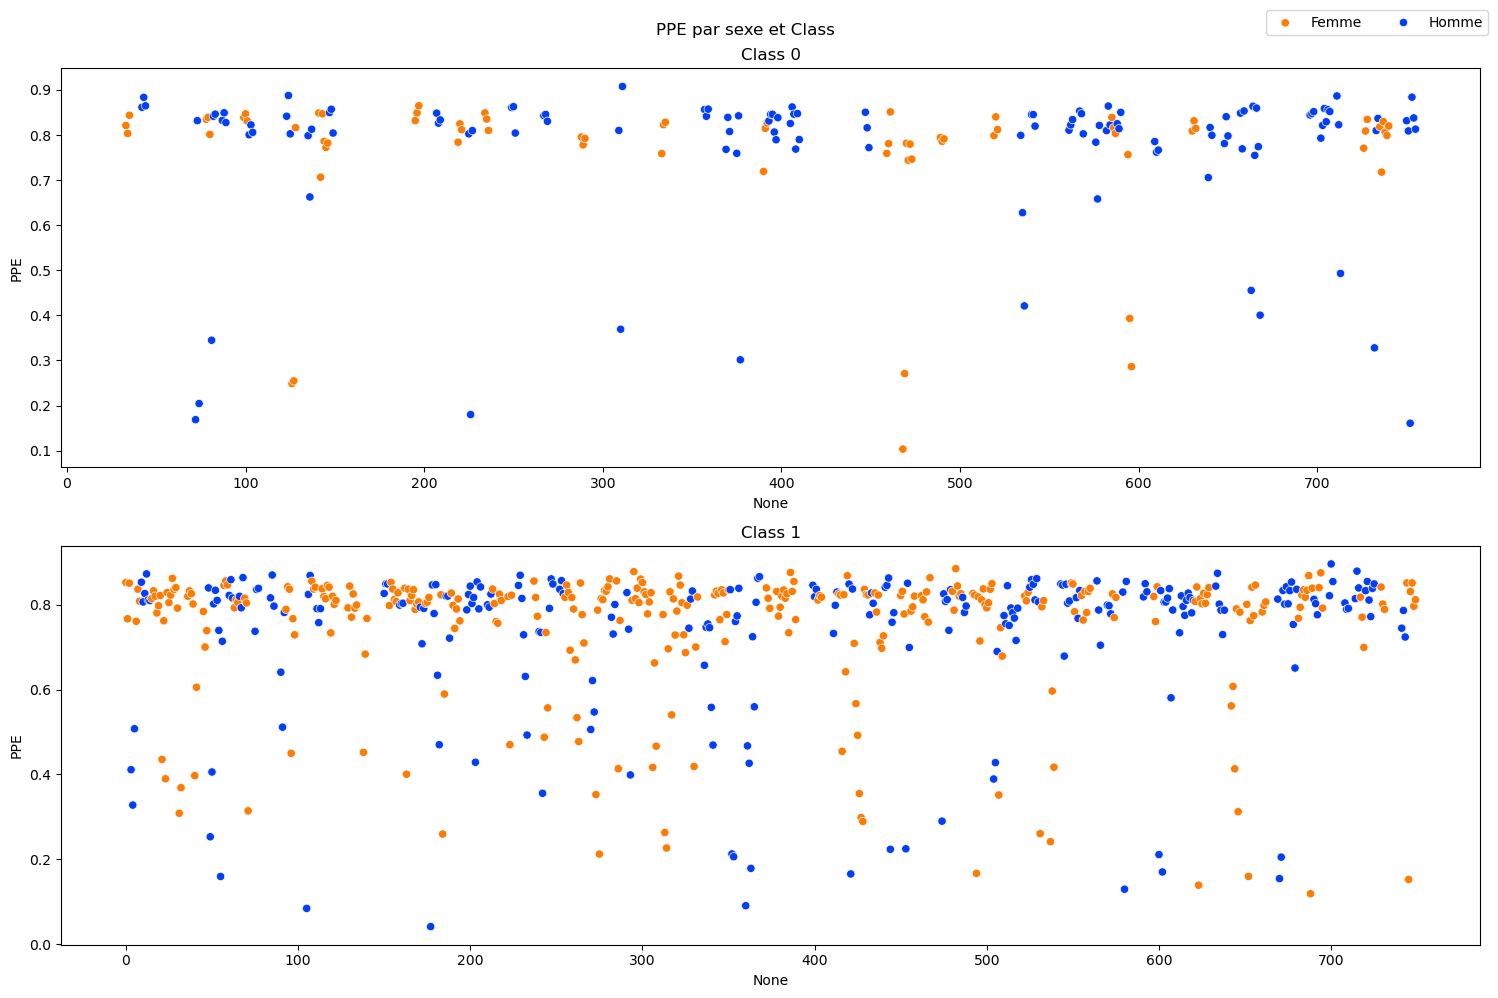

In [11]:
fig, axes = plt.subplots(2,1,figsize=(15,10))
fig.suptitle('PPE par sexe et Class')

sns.scatterplot(data = df_class_0, x=df.index, y='PPE', hue='gender', ax=axes[0], palette='bright')
sns.scatterplot(data = df_class_1, x=df.index, y='PPE', hue='gender', ax=axes[1], palette='bright')


fig.legend(labels=['Femme', 'Homme'], bbox_to_anchor=(1, 1), ncol=2)
axes[0].set_title('Class 0')
axes[1].set_title('Class 1')
# turn of the legend for subplots
axes[0].legend().remove()
axes[1].legend().remove()



plt.tight_layout()
plt.show()

In [12]:
df.groupby(['class', 'gender'])['DFA'].mean()

class  gender
0      0         0.663008
       1         0.665395
1      0         0.708585
       1         0.716089
Name: DFA, dtype: float64

1. **Classe 0** :
   - **Hommes (Genre 0)** : La moyenne DFA est **0.663008**.
   - **Femmes (Genre 1)** : La moyenne DFA est **0.665395**.
   - Dans cette classe, les moyennes DFA sont très proches, avec une légère prévalence chez les femmes.

2. **Classe 1** :
   - **Hommes (Genre 0)** : La moyenne DFA est **0.708585**.
   - **Femmes (Genre 1)** : La moyenne DFA est **0.716089**.
   - Ici aussi, les femmes ont une moyenne légèrement plus élevée que les hommes, mais la différence est plus marquée que dans la classe 0.


- **Tendance Générale** : Dans les deux classes, les moyennes DFA sont plus élevées pour les femmes par rapport aux hommes, ce qui pourrait indiquer une différence dans la dynamique des fluctuations des signaux analysés entre les sexes.

- **Comparaison entre Classes** : Les valeurs de DFA sont globalement plus élevées dans la classe 1 par rapport à la classe 0, ce qui pourrait suggérer que la condition ou le critère associé à la classe 1 entraîne des fluctuations plus importantes ou plus régulières dans les données analysées.

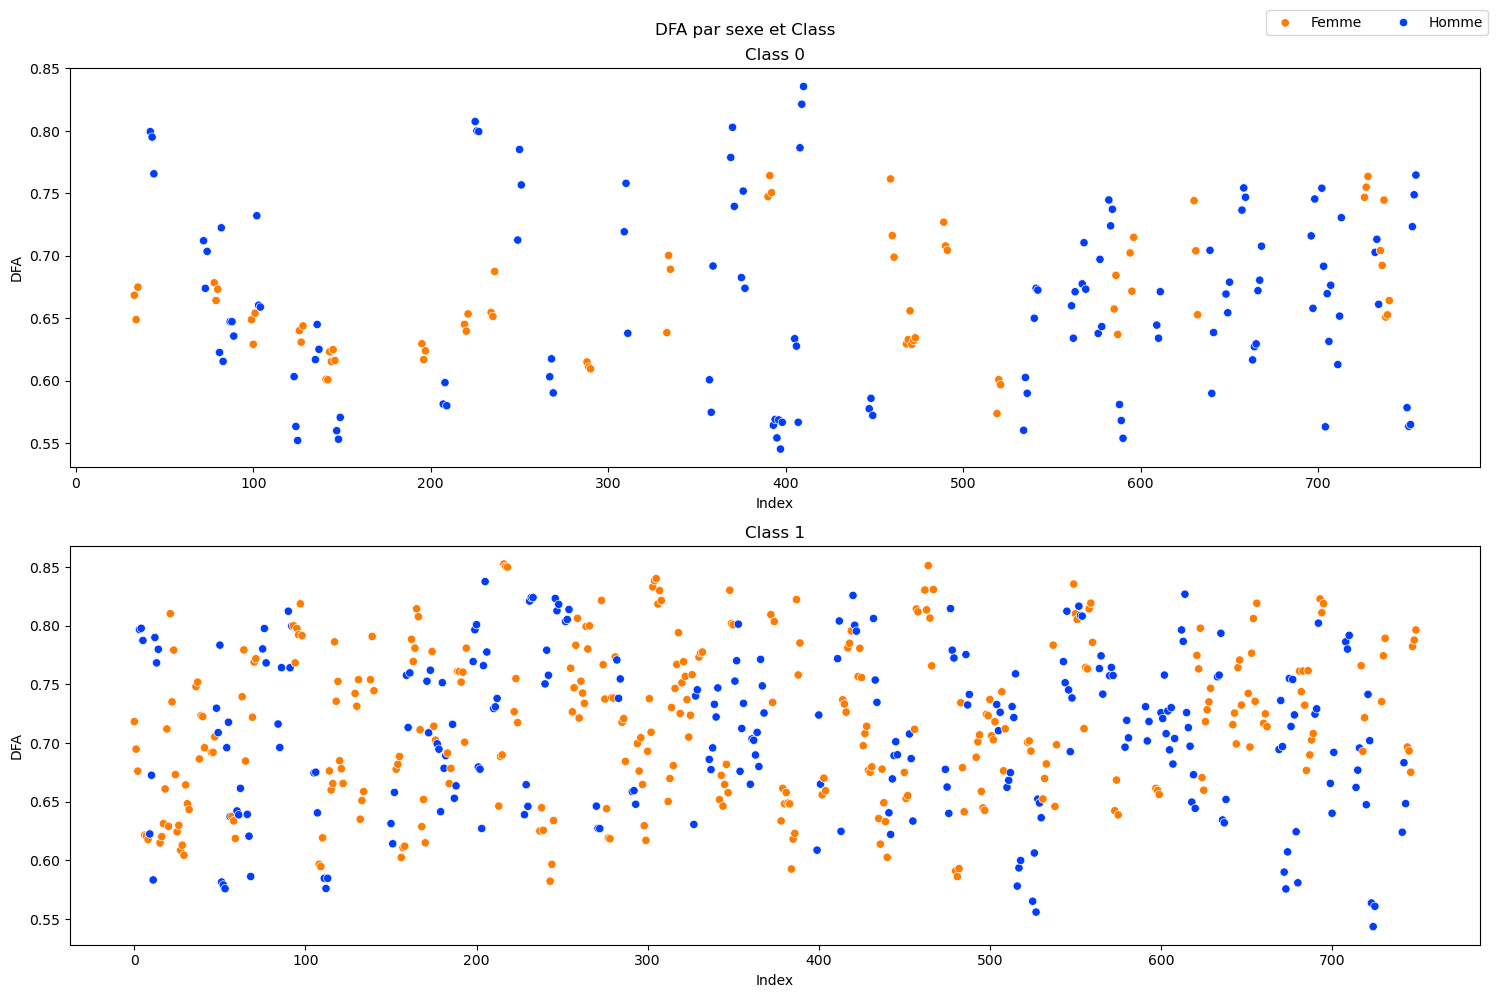

In [13]:
fig, axes = plt.subplots(2,1,figsize=(15,10))
fig.suptitle('DFA par sexe et Class')

sns.scatterplot(data = df_class_0, x=df.index, y='DFA', hue='gender', ax=axes[0], palette='bright')
sns.scatterplot(data = df_class_1, x=df.index, y='DFA', hue='gender', ax=axes[1], palette='bright')


fig.legend(labels=['Femme', 'Homme'], bbox_to_anchor=(1, 1), ncol=2)
axes[0].set_title('Class 0')
axes[1].set_title('Class 1')

axes[0].set_xlabel('Index')
axes[1].set_xlabel('Index')


axes[0].legend().remove()
axes[1].legend().remove()


plt.tight_layout()
plt.show()

In [14]:
df.groupby(['class', 'gender'])['RPDE'].mean()

class  gender
0      0         0.409846
       1         0.468173
1      0         0.493207
       1         0.520757
Name: RPDE, dtype: float64

1. **Classe 0** :
   - Dans la classe 0, les femmes (moyenne RPDE de **0.468173**) ont une moyenne supérieure à celle des hommes (moyenne RPDE de **0.409846**). Cela pourrait indiquer que les femmes présentent des caractéristiques vocales ou des fluctuations plus marquées dans cette classe.

2. **Classe 1** :
   - Dans la classe 1, les femmes (moyenne RPDE de **0.520757**) affichent également une moyenne plus élevée que les hommes (moyenne RPDE de **0.493207**). Ce résultat renforce l'idée que les femmes pourraient montrer des variations plus significatives dans leurs caractéristiques vocales ou physiologiques.

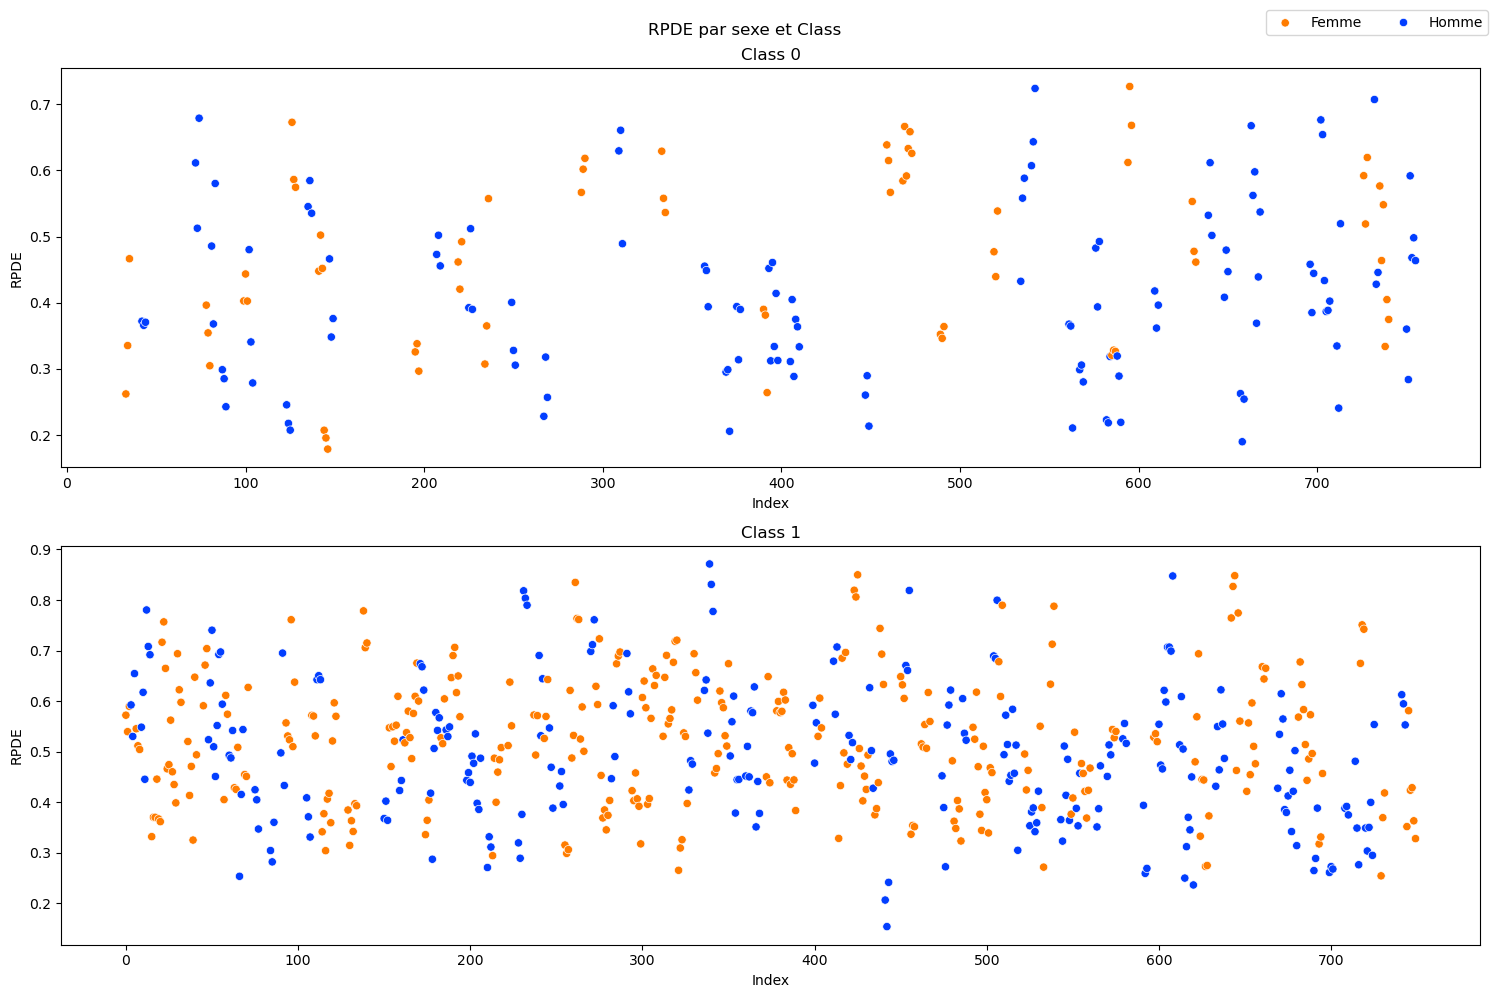

In [15]:
fig, axes = plt.subplots(2,1,figsize=(15,10))
fig.suptitle('RPDE par sexe et Class')

sns.scatterplot(data = df_class_0, x=df.index, y='RPDE', hue='gender', ax=axes[0], palette='bright')
sns.scatterplot(data = df_class_1, x=df.index, y='RPDE', hue='gender', ax=axes[1], palette='bright')


fig.legend(labels=['Femme', 'Homme'], bbox_to_anchor=(1, 1), ncol=2)
axes[0].set_title('Class 0')
axes[1].set_title('Class 1')

axes[0].set_xlabel('Index')
axes[1].set_xlabel('Index')


axes[0].legend().remove()
axes[1].legend().remove()


plt.tight_layout()
plt.show()

In [16]:
df.groupby(['class', 'gender'])['numPulses'].mean()

class  gender
0      0         416.365854
       1         293.594203
1      0         350.950617
       1         274.676012
Name: numPulses, dtype: float64

1. **Classe 0** :
   - **Hommes (Genre 0)** : La moyenne des impulsions est **416.37**.
   - **Femmes (Genre 1)** : La moyenne des impulsions est **293.59**.
   - Dans cette classe, les hommes présentent un nombre d'impulsions vocales significativement plus élevé que les femmes.

2. **Classe 1** :
   - **Hommes (Genre 0)** : La moyenne des impulsions est **350.95**.
   - **Femmes (Genre 1)** : La moyenne des impulsions est **274.68**.
   - Ici aussi, les hommes ont une moyenne supérieure à celle des femmes, bien que la différence soit moins marquée que dans la classe 0.

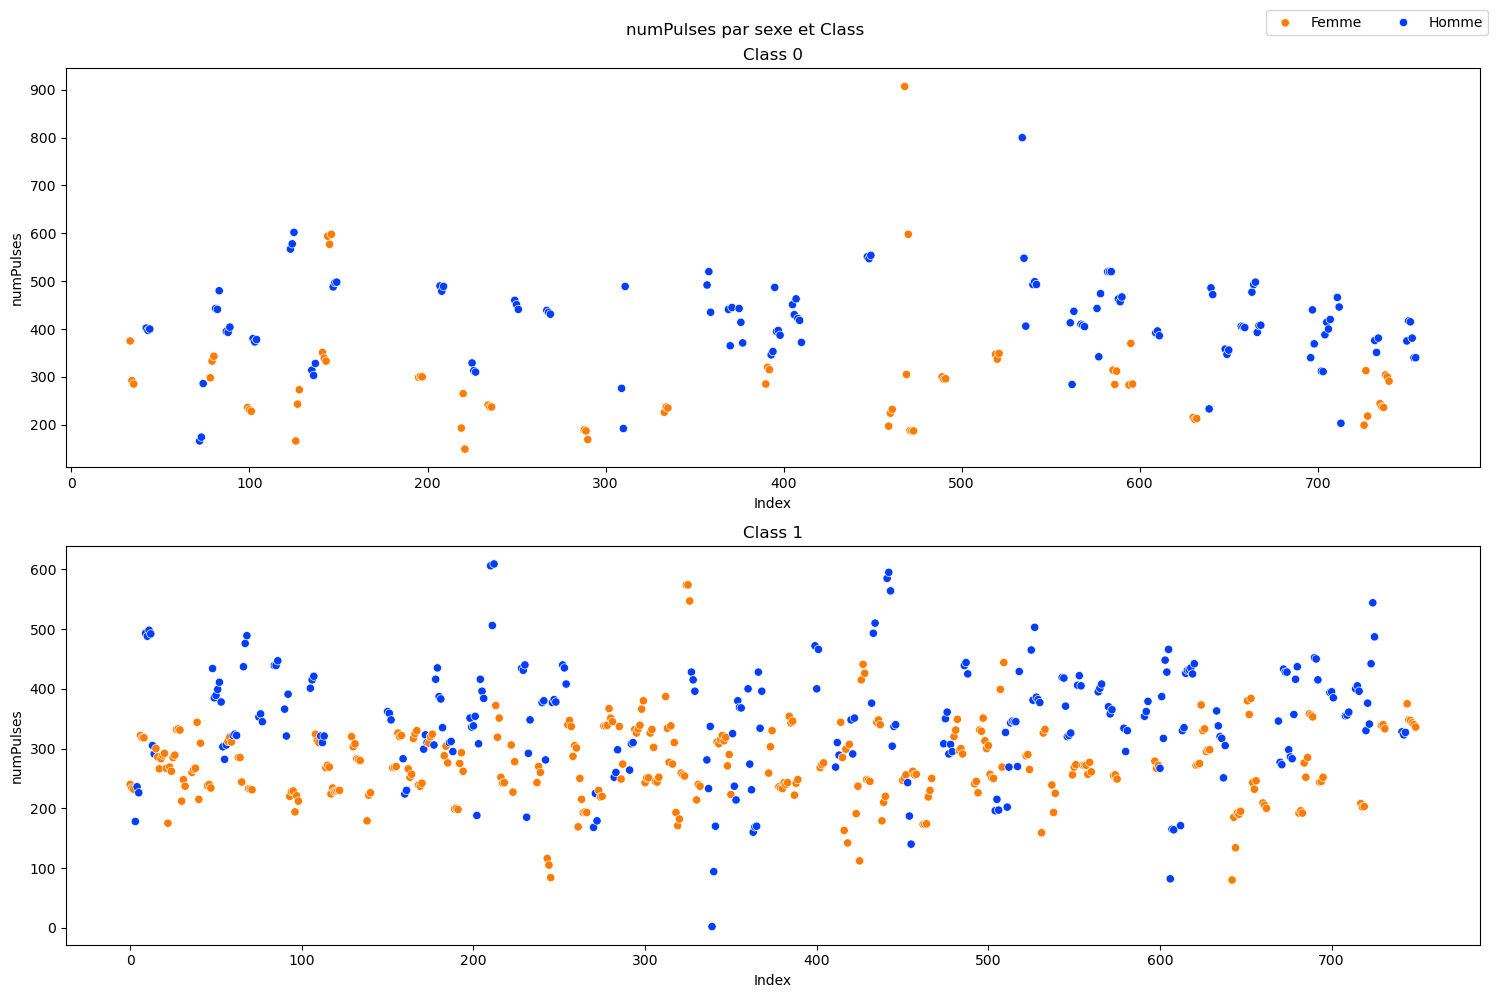

In [17]:
fig, axes = plt.subplots(2,1,figsize=(15,10))
fig.suptitle('numPulses par sexe et Class')

sns.scatterplot(data = df_class_0, x=df.index, y='numPulses', hue='gender', ax=axes[0], palette='bright')
sns.scatterplot(data = df_class_1, x=df.index, y='numPulses', hue='gender', ax=axes[1], palette='bright')


fig.legend(labels=['Femme', 'Homme'], bbox_to_anchor=(1, 1), ncol=2)
axes[0].set_title('Class 0')
axes[1].set_title('Class 1')

axes[0].set_xlabel('Index')
axes[1].set_xlabel('Index')


axes[0].legend().remove()
axes[1].legend().remove()


plt.tight_layout()
plt.show()

In [18]:
import matplotlib.pyplot as plt, seaborn as sns

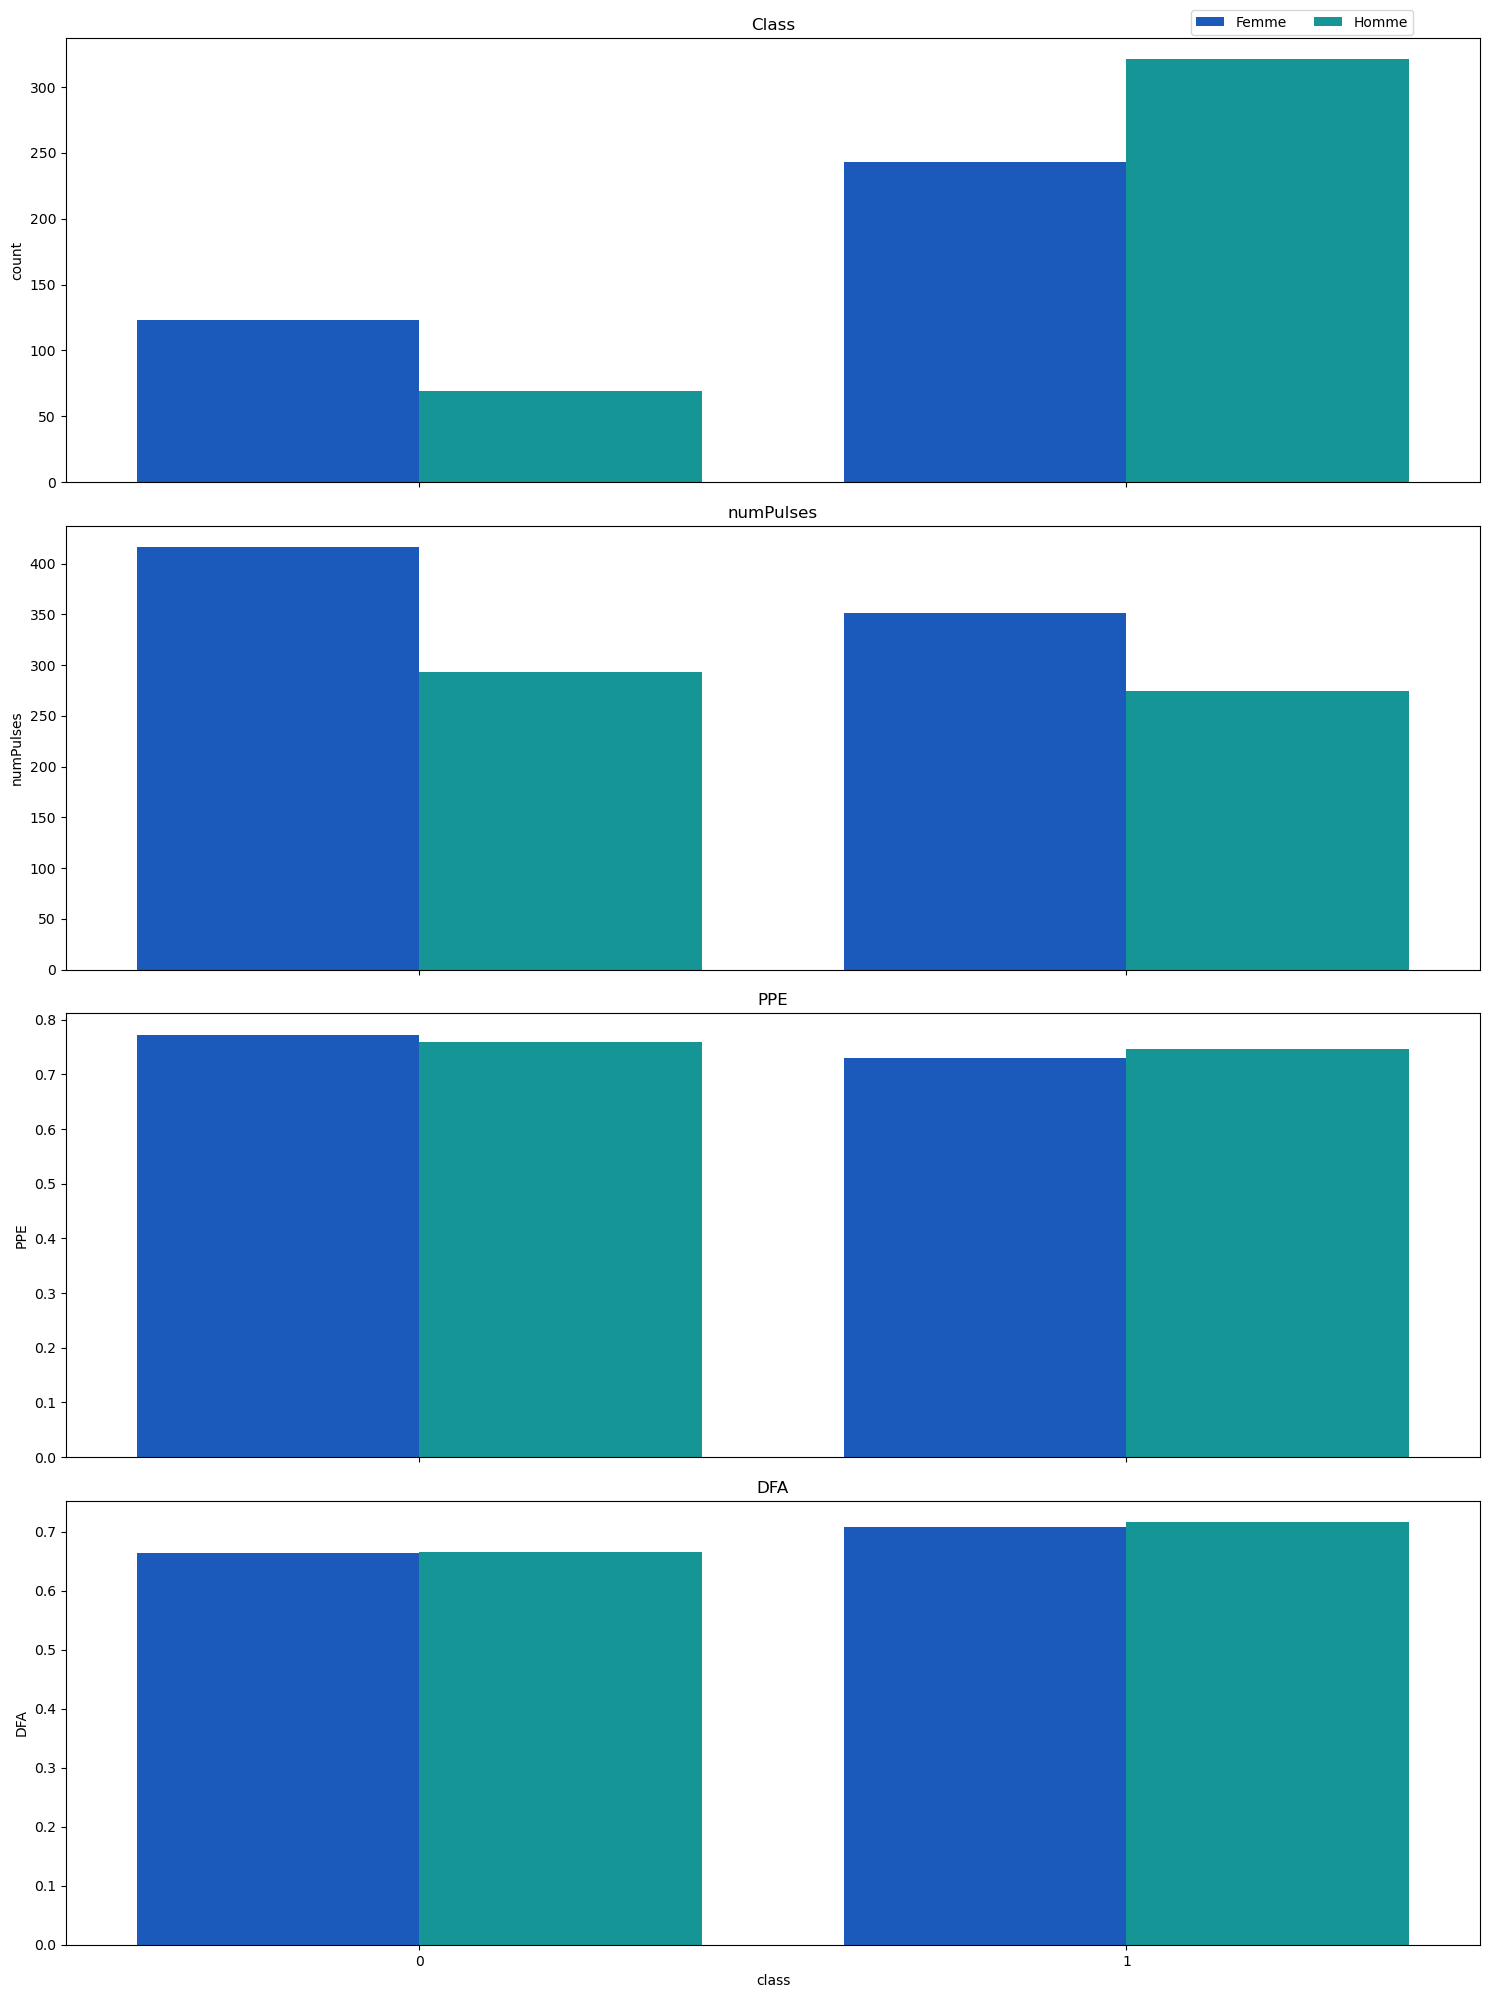

In [19]:
fig, axes = plt.subplots(4,1,figsize=(15,20), sharex=True)

sns.countplot(data = df, x='class', hue='gender', ax=axes[0], palette='winter')
sns.barplot(data=df.groupby(['class', 'gender'])['numPulses'].mean().reset_index(), x='class', y='numPulses', hue='gender', ax=axes[1],palette='winter')
sns.barplot(data=df.groupby(['class', 'gender'])['PPE'].mean().reset_index(), x='class', y='PPE', hue='gender', ax=axes[2], palette='winter')
sns.barplot(data=df.groupby(['class', 'gender'])['DFA'].mean().reset_index(), x='class', y='DFA', hue='gender', ax=axes[3], palette='winter')

fig.legend(labels=['Femme', 'Homme'], bbox_to_anchor=(0.95, 1), ncol=2)
axes[0].set_title('Class')
axes[1].set_title('numPulses')
axes[2].set_title('PPE')
axes[3].set_title('DFA')

for ax in axes:
    ax.legend().remove()
    ax.set_yscale('linear')

plt.tight_layout()
plt.show()


Dans notre ensemble des jeux, il existe un environ de 748 differntes caracteristiques. Donc pour faciliter le processus de visualisation, nous cherchons a travailler juste avec les caracteristiques les plus correlees avec notre caracteristique cible.

In [20]:
# Selectionner les caracteristiques les plus correlatifs
selected_features = []
corrDict = dict(sorted(df.corr()['class'].to_dict().items(), key=lambda item: item[1], reverse=True))
corrDict.pop('class')

#  Selectionner les top 5 et last 5
selected_features = list(corrDict.keys())[:5]
selected_features.extend(list(corrDict.keys())[-5:])

selected_features

['mean_MFCC_2nd_coef',
 'tqwt_minValue_dec_12',
 'tqwt_minValue_dec_11',
 'tqwt_minValue_dec_13',
 'std_9th_delta_delta',
 'tqwt_maxValue_dec_11',
 'tqwt_entropy_log_dec_12',
 'tqwt_stdValue_dec_11',
 'tqwt_maxValue_dec_12',
 'tqwt_stdValue_dec_12']

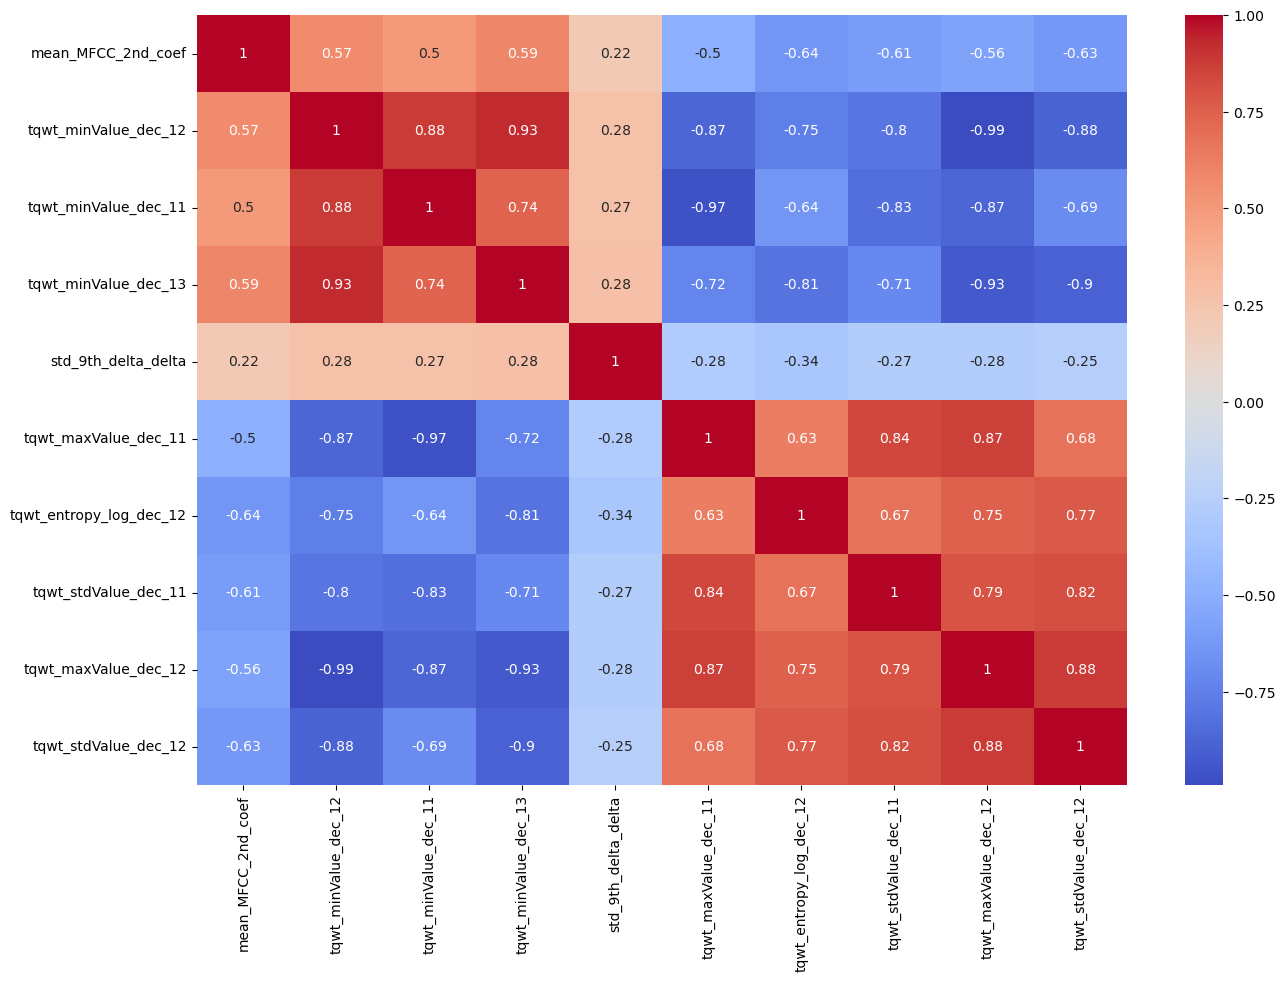

In [21]:
fig, axes = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', ax=axes)
plt.show()


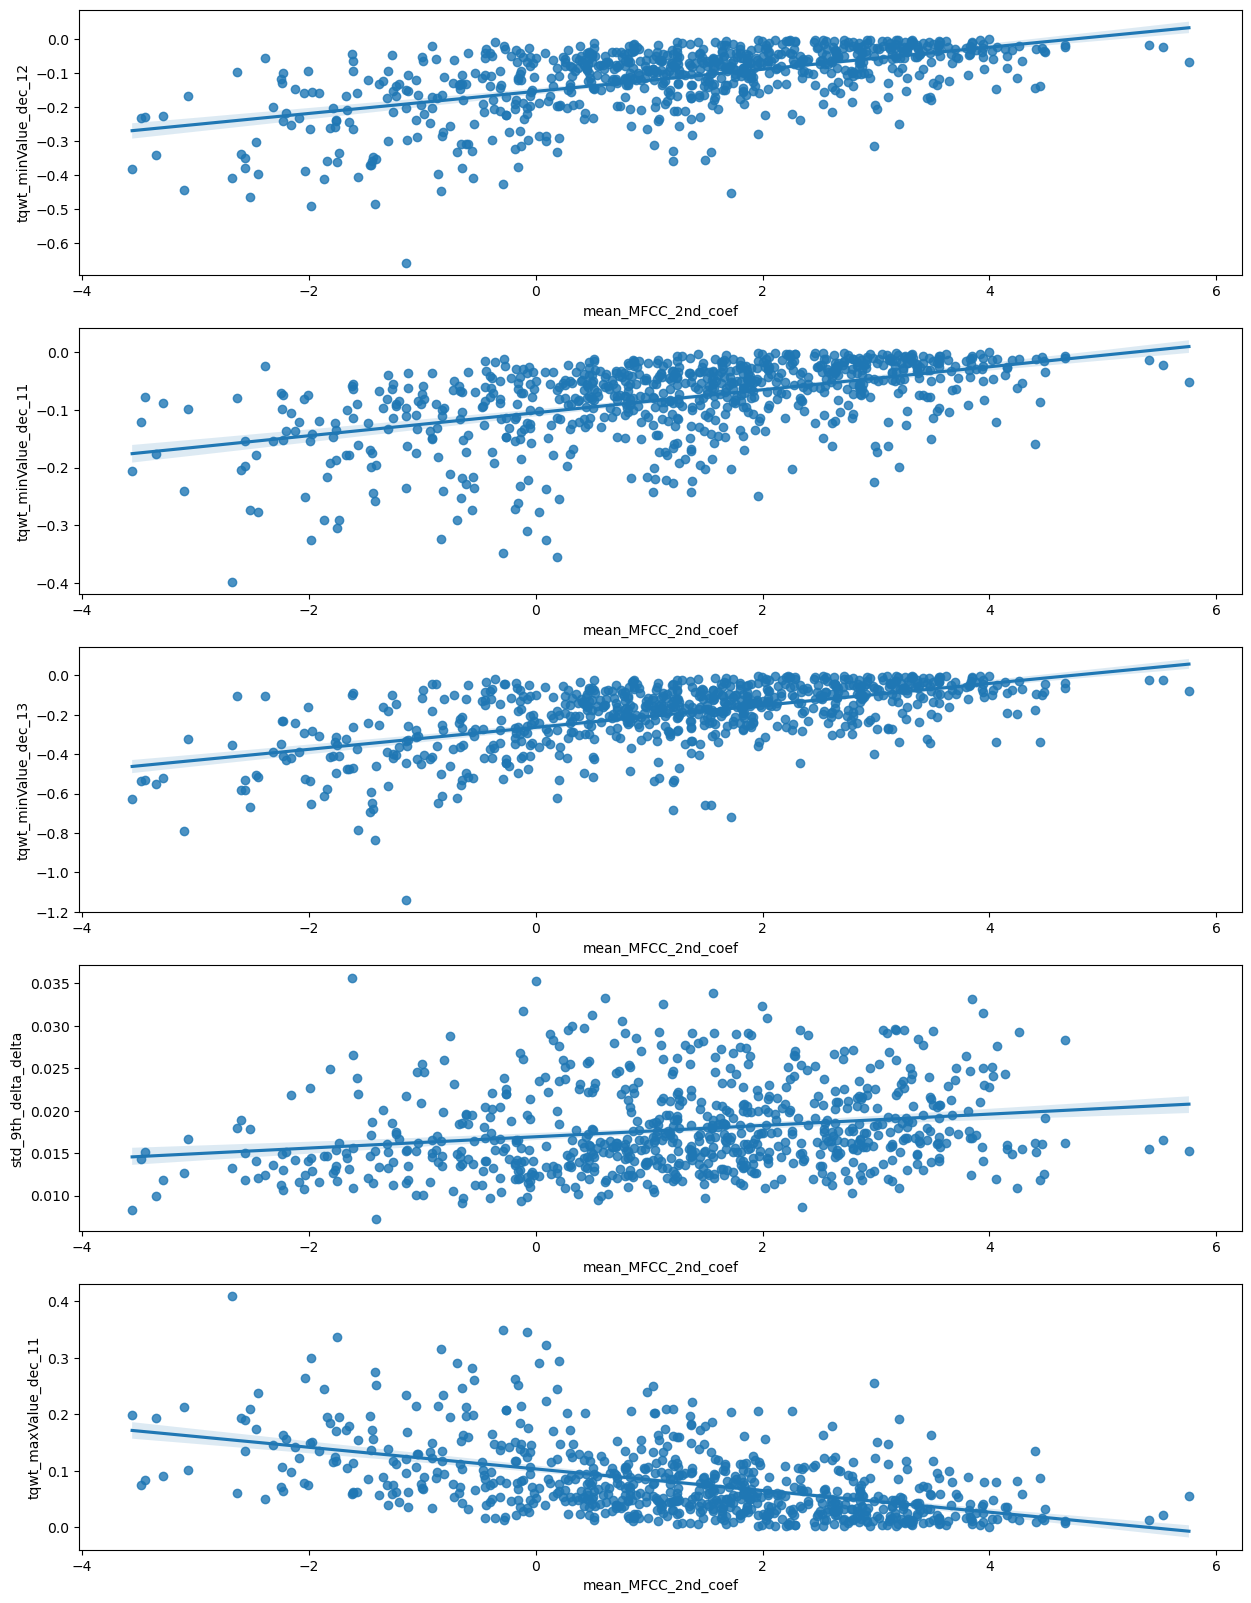

In [22]:
fig, axes = plt.subplots(5,1,figsize=(15,20))

sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_minValue_dec_12' , ax=axes[0])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_minValue_dec_11' , ax=axes[1])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_minValue_dec_13' , ax=axes[2])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'std_9th_delta_delta'  , ax=axes[3])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_maxValue_dec_11' , ax=axes[4])

plt.show()

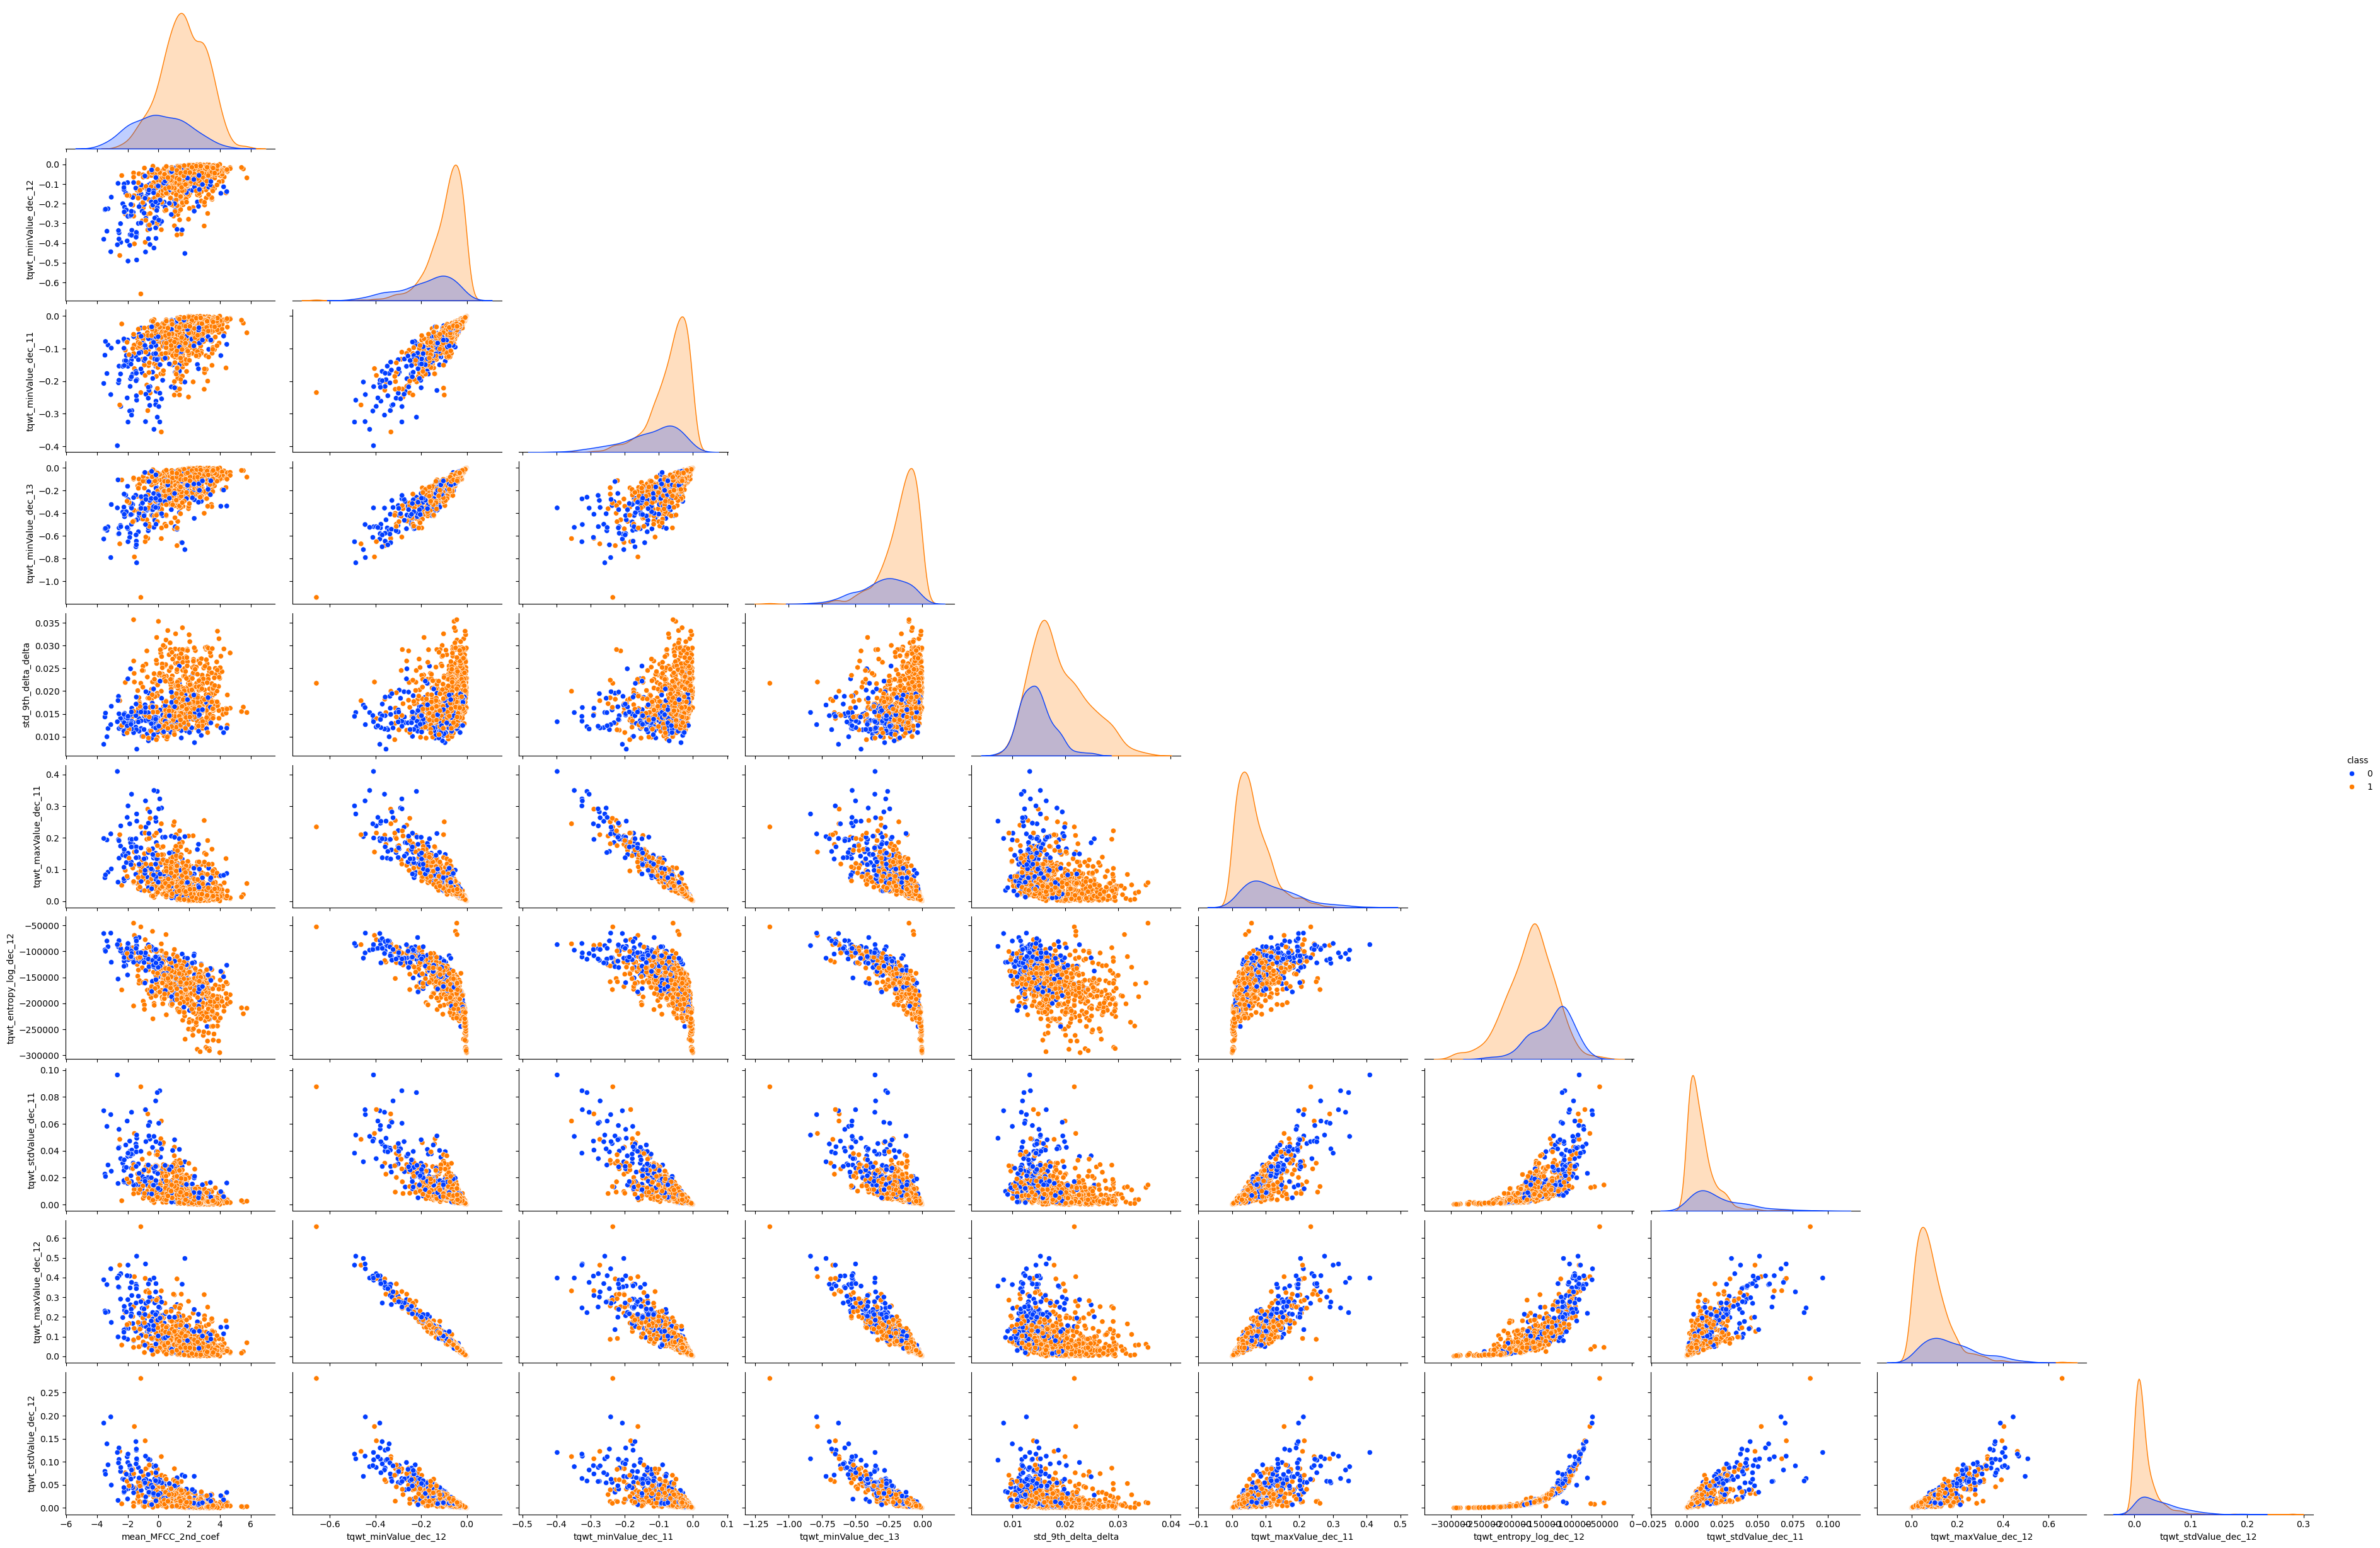

In [23]:
pairplot = sns.pairplot(
    data=df[selected_features + ['class']], 
    vars=selected_features, 
    diag_kind='kde', 
    markers='o',
    hue='class',
    height=2.5, 
    aspect=1.5,
    palette='bright',
    corner=True
)

plt.show()

<hr>

## Algorithme de prétraitement et de sélection des caractéristiques d'ensemble

### Pipeline de Prétraitement


Dans nos recherches, nous avons créé un pipeline de prétraitement ultra-flexible pour transformer des données brutes en un matériau prêt à briller pour l'apprentissage automatique. Ce pipeline est comme une boîte à outils où chaque fonction peut être activée ou désactivée selon les besoins de l'ensemble de données ou de la tâche à accomplir.

Le processus commence par régler les problèmes classiques : gestion des valeurs manquantes (imputation ou suppression) et suppression des doublons pour éviter les redondances. Ensuite, pour traiter les données déséquilibrées, nous utilisons des techniques comme SMOTE, qui rééchantillonne les classes minoritaires pour un meilleur équilibre, notamment pour les tâches de classification.

Le pipeline sépare ensuite les caractéristiques (X) de la cible (Y), garantissant que chaque élément est à sa place. Il détecte automatiquement les données numériques et catégorielles, puis applique les traitements appropriés : normalisation pour les numériques et encodage pour les catégorielles (comme le codage à un coup ou par étiquette).

Enfin, la flexibilité du pipeline permet d'activer ou de désactiver certains prétraitements à la volée, selon les besoins spécifiques. Une fois les étapes terminées, le pipeline livre un jeu de données propre, prêt à être analysé ou utilisé pour entraîner des modèles. 

In [24]:
from preprocessing import preprocessing_pipeline

df = preprocessing_pipeline(
    df, 
    target_column='class', 
    missing_values_option='drop',
    random_state=42,
    verbose=True, 
)

dropping duplicates ...done


### Application des Algorithmes de l'EFSA


Dans le cadre de notre travail, nous avons conçu à partir de zéro un ensemble d'algorithmes pour implémenter l'**Ensemble Feature Selection Algorithm (EFSA)**, combinant les approches **Filter**, **Wrapper** et **Embedded** afin de sélectionner les caractéristiques les plus pertinentes pour chaque modèle de classification.

1. **Méthode Filter : Filtrage par Corrélation de Pearson**  
   La première étape consiste à utiliser un **filtrage basé sur la corrélation de Pearson**. Cette méthode statistique évalue la force de la relation linéaire entre chaque caractéristique et la variable cible. Les caractéristiques dont la corrélation est inférieure à un seuil défini sont éliminées, ce qui permet une sélection rapide et efficace des variables les plus significatives, tout en réduisant la dimensionnalité des données.

2. **Méthode Wrapper : Élimination Arrière avec Random Forest et Régression Logistique**  
   Pour la méthode **Wrapper**, nous avons mis en œuvre une **élimination arrière** en utilisant deux modèles : **Random Forest** et **Régression Logistique**.  
   - **Random Forest** élimine de manière récursive les caractéristiques en fonction de leur **importance** dans le modèle, mesurée par le gain d'information ou l'impureté. À chaque étape, la caractéristique la moins importante est supprimée, et le modèle est réévalué jusqu'à ce qu'il n'y ait plus d'amélioration.  
   - Avec **Régression Logistique**, l'élimination des caractéristiques se base sur leurs **p-valeurs**. Les caractéristiques dont la p-valeur dépasse un seuil défini sont éliminées, ce qui simplifie le modèle tout en maintenant son efficacité.

3. **Méthode Embedded : Recursive Feature Elimination avec Random Forest et Régression Logistique**  
   Enfin, pour la méthode **Embedded**, nous avons développé deux algorithmes de **Recursive Feature Elimination (RFE)**.  
   - **Random Forest** évalue de manière récursive l'importance des caractéristiques et les élimine au fur et à mesure jusqu'à obtenir un sous-ensemble optimal, réduisant la complexité tout en maintenant une performance élevée.  
   - Dans le cas de **Régression Logistique**, l'élimination des caractéristiques se fait en évaluant l'impact des **coefficients** sur la précision des prédictions. Ce processus continue jusqu'à ce que seules les caractéristiques les plus pertinentes soient conservées.

L'intégration de ces trois méthodes dans un **EFSA** robuste permet de sélectionner les caractéristiques les plus pertinentes, tout en réduisant la dimensionnalité des données et en améliorant l'efficacité et la précision des modèles de machine learning.

Afin d'optimiser la structure et la gestion des dépendances entre les modules, nous avons regroupé ces algorithmes dans un module **EFSA** et intégré un **efsa_pipeline**. Ce pipeline facilite l'application cohérente des différentes méthodes de sélection de caractéristiques sur les données, offrant ainsi un cadre plus organisé et modulaire pour le traitement des données. Cependant, un défi majeur auquel nous avons été confrontés était le coût de calcul élevé associé à l'exécution de ces algorithmes, particulièrement pour les grands ensembles de données. Pour y remédier, nous avons intégré des **données pré-catégorisées**, éliminant ainsi la nécessité de transformations et de catégorisation supplémentaires. Cette solution a non seulement permis de réduire le temps de traitement, mais aussi d'optimiser l'efficacité du pipeline tout en préservant la qualité des résultats. Grâce à cette approche, nous avons amélioré la modularité de notre travail, réduit les coûts de calcul et optimisé les performances des modèles de classification.

In [25]:
from efsa import efsa_pipeline

subsets = efsa_pipeline(df, target_column='class', verbose=True,max_columns=30,min_cor=0.35)

Data Found, importing...
Performing EFSA:
	--->Filtrage par Corrélation de Pearson... Done
	--->Backward elimination based Wrapper... 
Done
	--->Recusrive Feature Elimination based Embedded... Done

	EFSA done


In [26]:
print(
    len(subsets['Corr-Filter']),
    len(subsets['Wrapper']),
    len(subsets['Embedded']),
)

52 88 30


Les résultats montrent le nombre de caractéristiques sélectionnées par chaque méthode de l'EFSA pipeline :

- Corr-Filter (Filtrage par Corrélation de Pearson) : 23 caractéristiques ont été sélectionnées.
- RF-Wrapper (Wrapper avec Random Forest) : 23 caractéristiques ont été sélectionnées.
- LR-Wrapper (Wrapper avec Régression Logistique) : 23 caractéristiques ont été sélectionnées.
- RF-Embedded (Embedded avec Random Forest) : 25 caractéristiques ont été sélectionnées.
- LR-Embedded (Embedded avec Régression Logistique) : 25 caractéristiques ont été sélectionnées.

In [27]:
# Union des sous-ensembles pour RF
subsets['Union'] = list(
    set(
        subsets['Corr-Filter'] + \
        subsets['Wrapper'] + \
        subsets['Embedded']
    ))
print(len(subsets['Union']))

136


In [28]:
print(subsets['Union'])

['tqwt_entropy_shannon_dec_35', 'tqwt_medianValue_dec_3', 'tqwt_entropy_log_dec_1', 'gender', 'meanHarmToNoiseHarmonicity', 'std_delta_log_energy', 'std_8th_delta_delta', 'tqwt_TKEO_mean_dec_25', 'mean_12th_delta', 'mean_MFCC_7th_coef', 'tqwt_medianValue_dec_14', 'tqwt_medianValue_dec_36', 'tqwt_TKEO_std_dec_27', 'tqwt_maxValue_dec_24', 'tqwt_medianValue_dec_17', 'tqwt_entropy_log_dec_9', 'std_7th_delta', 'std_9th_delta_delta', 'meanIntensity', 'tqwt_entropy_log_dec_15', 'tqwt_stdValue_dec_12', 'mean_1st_delta_delta', 'tqwt_entropy_shannon_dec_25', 'tqwt_meanValue_dec_25', 'mean_MFCC_2nd_coef', 'tqwt_maxValue_dec_33', 'tqwt_meanValue_dec_6', 'tqwt_entropy_log_dec_10', 'tqwt_kurtosisValue_dec_18', 'tqwt_kurtosisValue_dec_33', 'mean_MFCC_0th_coef', 'tqwt_medianValue_dec_15', 'tqwt_entropy_log_dec_33', 'tqwt_minValue_dec_13', 'tqwt_maxValue_dec_5', 'mean_4th_delta', 'tqwt_maxValue_dec_6', 'tqwt_kurtosisValue_dec_20', 'tqwt_TKEO_std_dec_17', 'tqwt_maxValue_dec_14', 'tqwt_TKEO_mean_dec_18',

Dans notre travail, nous avons procédé à l'union des sous-ensembles de caractéristiques sélectionnées par les différentes méthodes de l'EFSA pipeline : Corr-Filter, RF-Wrapper, LR-Wrapper, RF-Embedded, et LR-Embedded. Après avoir combiné les caractéristiques sélectionnées par chacune de ces méthodes, nous avons utilisé un ensemble (set) pour éliminer les doublons et conserver uniquement les caractéristiques uniques. En appliquant cette union, nous avons obtenu un sous-ensemble final de 83 caractéristiques.

Cela signifie que, en combinant les résultats des différentes méthodes de sélection de caractéristiques, nous avons réduit la dimensionnalité tout en conservant une large variété de caractéristiques pertinentes, ce qui devrait contribuer à améliorer la performance des modèles de classification tout en évitant le surajustement.

In [29]:
data_with_EFSA = df[subsets['Union']+['class']].copy()
data_without_EFSA = df.copy()

<hr>

# Entrainement des models et Evaluation 

## Logistic Regression


### Preparation des ensembles d'entrainement et test 

#### Avec EFSA

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_efsa = data_with_EFSA.drop('class', axis='columns').values
y_efsa = data_with_EFSA['class'].values
scaler = StandardScaler()
x_efsa = scaler.fit_transform(x_efsa)

x_train_efsa,x_test_efsa,y_train_efsa,y_test_efsa = train_test_split(x_efsa,y_efsa, test_size=0.2, random_state=42)

#### Sans EFSA

In [46]:
x = data_without_EFSA.drop('class', axis='columns').values
y = data_without_EFSA['class'].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Application de modele 

#### Sans EFSA

In [47]:
from LogisticRegression import train_lr, predict as predict_lr
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef,accuracy_score
from time import time

start_train = time()
weights, bias = train_lr(x_train, y_train, learning_rate=0.001, epsilon=0.00001, max_iteration=8000)
end_train = time()

start_test = time()
y_pred = predict_lr(X =x_test, weights=weights, bias=bias)
end_test = time()

accuracy = accuracy_score(y_test,y_pred)*100
f1 = f1_score(y_test, y_pred, average='macro') * 100
precision = precision_score(y_test, y_pred, average='macro')* 100
recall = recall_score(y_test, y_pred, average='macro')* 100
mcc = matthews_corrcoef(y_test, y_pred)* 100

In [48]:
results_df = pd.DataFrame(
    {
        'Model': ['Logistic Regression'],
        'Test Accuracy': [accuracy],
        'F1-score': [f1],
        'Precision': [precision],
        'Recall': [recall],
        'MCC %': [mcc],
        'Training Time (sec)': [end_train - start_train],
        'Testing time (sec)': [end_test - start_test],
        'EFSA': [False],
    }
)

results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False


#### Avec EFSA

In [49]:
start_train = time()
weights, bias = train_lr(x_train_efsa, y_train_efsa, learning_rate=0.001, epsilon=0.00001, max_iteration=8000)
end_train = time()

start_test = time()
y_pred = predict_lr(X =x_test_efsa, weights=weights, bias=bias)
end_test = time()

accuracy = accuracy_score(y_test_efsa,y_pred)*100
f1 = f1_score(y_test_efsa, y_pred, average='macro') * 100
precision = precision_score(y_test_efsa, y_pred, average='macro')* 100
recall = recall_score(y_test_efsa, y_pred, average='macro')* 100
mcc = matthews_corrcoef(y_test_efsa, y_pred)* 100

results_df.loc[1] = ['Logistic Regression', 
                                   accuracy, 
                                   f1, 
                                   precision, 
                                   recall, 
                                   mcc, 
                                   end_train - start_train, 
                                   end_test - start_test, 
                                   True]

results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False
1,Logistic Regression,89.823009,89.789223,89.811321,89.770675,79.581985,3.552226,0.000000,True


## Random Forest

### Preparation des ensembles d'entrainement et test 

#### Transformation en categories

In [50]:
# Notre dataframe faut etre categorisee pour reduire exponenentiellement le temps d'entrainement
from DecisionTreeC45 import detect_continuous_columns, to_category
from os.path import exists

if exists('to_category.csv'):
    df_categorised = pd.read_csv('to_category.csv')
else:
    df_categorised = df.copy()
    continuous_columns = detect_continuous_columns(df_categorised, threshold=10)
    for feature in continuous_columns:
        df_categorised[feature] = to_category(df, feature, 'class')
    df_categorised.to_csv('to_category.csv', index=False)


#### Separation en train et test data

In [51]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(
    df_categorised, 
    test_size=0.2, 
    random_state=42
)


### Application de modele 

#### Sans EFSA

In [52]:
# Get all valid performances of the model without EFSA
from RandomForest import train_random_forest, predict_random_forest
from time import time

start_train = time()
trees, __ = train_random_forest(
            train, 
            nbr_trees=10, 
            tree_min_data=50, 
            target_feature='class', 
            tree_max_depth = 30
)
end_train = time()

start_test = time()
y_pred = predict_random_forest(trees, test)
end_test = time()

accuracy = accuracy_score(test['class'].values,y_pred)*100
f1 = f1_score(test['class'].values, y_pred, average='macro') * 100
precision = precision_score(test['class'].values, y_pred, average='macro') * 100
recall = recall_score(test['class'].values, y_pred, average='macro') * 100
mcc = matthews_corrcoef(test['class'].values, y_pred) * 100

results_df.loc[2] = ['Random Forest', 
                                   accuracy, f1, 
                                   precision, recall, 
                                   mcc, end_train - start_train, 
                                   end_test - start_test, False]

results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False
1,Logistic Regression,89.823009,89.789223,89.811321,89.770675,79.581985,3.552226,0.000000,True
2,Random Forest,88.495575,88.463049,89.931699,89.028509,78.955042,15.784967,0.159475,False


#### Avec EFSA

In [53]:
start_train = time()
trees, __ = train_random_forest(
            train[subsets['Union']+["class"]], 
            nbr_trees=10, 
            tree_min_data=50, 
            target_feature='class', 
            tree_max_depth = 30
)
end_train = time()

start_test = time()
y_pred = predict_random_forest(trees, test[subsets['Union']])
end_test = time()

accuracy = accuracy_score(test['class'].values,y_pred)*100
f1 = f1_score(test['class'].values, y_pred, average='macro') * 100
precision = precision_score(test['class'].values, y_pred, average='macro') * 100
recall = recall_score(test['class'].values, y_pred, average='macro') * 100
mcc = matthews_corrcoef(test['class'].values, y_pred) * 100

results_df.loc[3] = ['Random Forest', 
                                   accuracy, f1, 
                                   precision, recall, 
                                   mcc, end_train - start_train, 
                                   end_test - start_test, True]

results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False
1,Logistic Regression,89.823009,89.789223,89.811321,89.770675,79.581985,3.552226,0.000000,True
2,Random Forest,88.495575,88.463049,89.931699,89.028509,78.955042,15.784967,0.159475,False
3,Random Forest,86.283186,86.222493,88.092148,86.880547,74.962904,4.867107,0.225254,True


## LightGBM

### Preparation des ensembles pour l'entrainement et la test

In [54]:
x_train_lgbm = train.drop('class', axis='columns')
x_test_lgbm = test.drop('class', axis='columns')
y_train_lgbm = train['class']
y_test_lgbm = test['class']

### Application de modele

#### Sans EFSA

In [55]:
from lgbm import fit as fit_lgbm,predict as predict_lgbm

start_train = time()
trees,init_prediction,_ = fit_lgbm(x_train_lgbm.values,y_train_lgbm.values,n_estimators=50, learning_rate=0.1, max_depth=10, min_samples_split=10)
end_train = time()

start_test = time()
y_pred = predict_lgbm(x_test_lgbm.values,trees,init_prediction,0.1)
end_test = time()

accuracy = accuracy_score(y_test_lgbm.values,y_pred)*100
f1 = f1_score(y_test_lgbm.values, y_pred, average='macro') * 100
precision = precision_score(y_test_lgbm.values, y_pred, average='macro') * 100
recall = recall_score(y_test_lgbm.values, y_pred, average='macro') * 100
mcc = matthews_corrcoef(y_test_lgbm.values, y_pred) * 100

results_df.loc[4] = ['LGBM', 
                    accuracy, f1, 
                    precision, recall, 
                    mcc, end_train - start_train, 
                    end_test - start_test, False]

results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False
1,Logistic Regression,89.823009,89.789223,89.811321,89.770675,79.581985,3.552226,0.000000,True
2,Random Forest,88.495575,88.463049,89.931699,89.028509,78.955042,15.784967,0.159475,False
3,Random Forest,86.283186,86.222493,88.092148,86.880547,74.962904,4.867107,0.225254,True
4,LGBM,87.610619,87.595076,87.575401,87.669834,75.245177,1607.408382,0.034887,False


#### Avec EFSA

In [56]:
start_train = time()
trees,init_prediction,_ = fit_lgbm(x_train_lgbm[subsets['Union']].values,y_train_lgbm.values,n_estimators=50, learning_rate=0.1, max_depth=10, min_samples_split=10)
end_train = time()

start_test = time()
y_pred = predict_lgbm(x_test_lgbm[subsets['Union']].values,trees,init_prediction,0.1)
end_test = time()


accuracy = accuracy_score(y_test_lgbm.values,y_pred)*100
f1 = f1_score(y_test_lgbm.values, y_pred, average='macro') * 100
precision = precision_score(y_test_lgbm.values, y_pred, average='macro') * 100
recall = recall_score(y_test_lgbm.values, y_pred, average='macro') * 100
mcc = matthews_corrcoef(y_test_lgbm.values, y_pred) * 100

results_df.loc[5] = ['LGBM', 
                    accuracy, f1, 
                    precision, recall, 
                    mcc, end_train - start_train, 
                    end_test - start_test, True]

results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False
1,Logistic Regression,89.823009,89.789223,89.811321,89.770675,79.581985,3.552226,0.000000,True
2,Random Forest,88.495575,88.463049,89.931699,89.028509,78.955042,15.784967,0.159475,False
3,Random Forest,86.283186,86.222493,88.092148,86.880547,74.962904,4.867107,0.225254,True
4,LGBM,87.610619,87.595076,87.575401,87.669834,75.245177,1607.408382,0.034887,False
5,LGBM,87.610619,87.606737,87.669409,87.764078,75.433427,21.117981,0.023949,True


# Visualisation des performances 

In [57]:
results_df

,Model,Test Accuracy,F1-score,Precision,Recall,MCC %,Training Time (sec),Testing time (sec),EFSA
0,Logistic Regression,90.265487,90.227987,90.279418,90.190843,80.470211,5.965804,0.000997,False
1,Logistic Regression,89.823009,89.789223,89.811321,89.770675,79.581985,3.552226,0.000000,True
2,Random Forest,88.495575,88.463049,89.931699,89.028509,78.955042,15.784967,0.159475,False
3,Random Forest,86.283186,86.222493,88.092148,86.880547,74.962904,4.867107,0.225254,True
4,LGBM,87.610619,87.595076,87.575401,87.669834,75.245177,1607.408382,0.034887,False
5,LGBM,87.610619,87.606737,87.669409,87.764078,75.433427,21.117981,0.023949,True


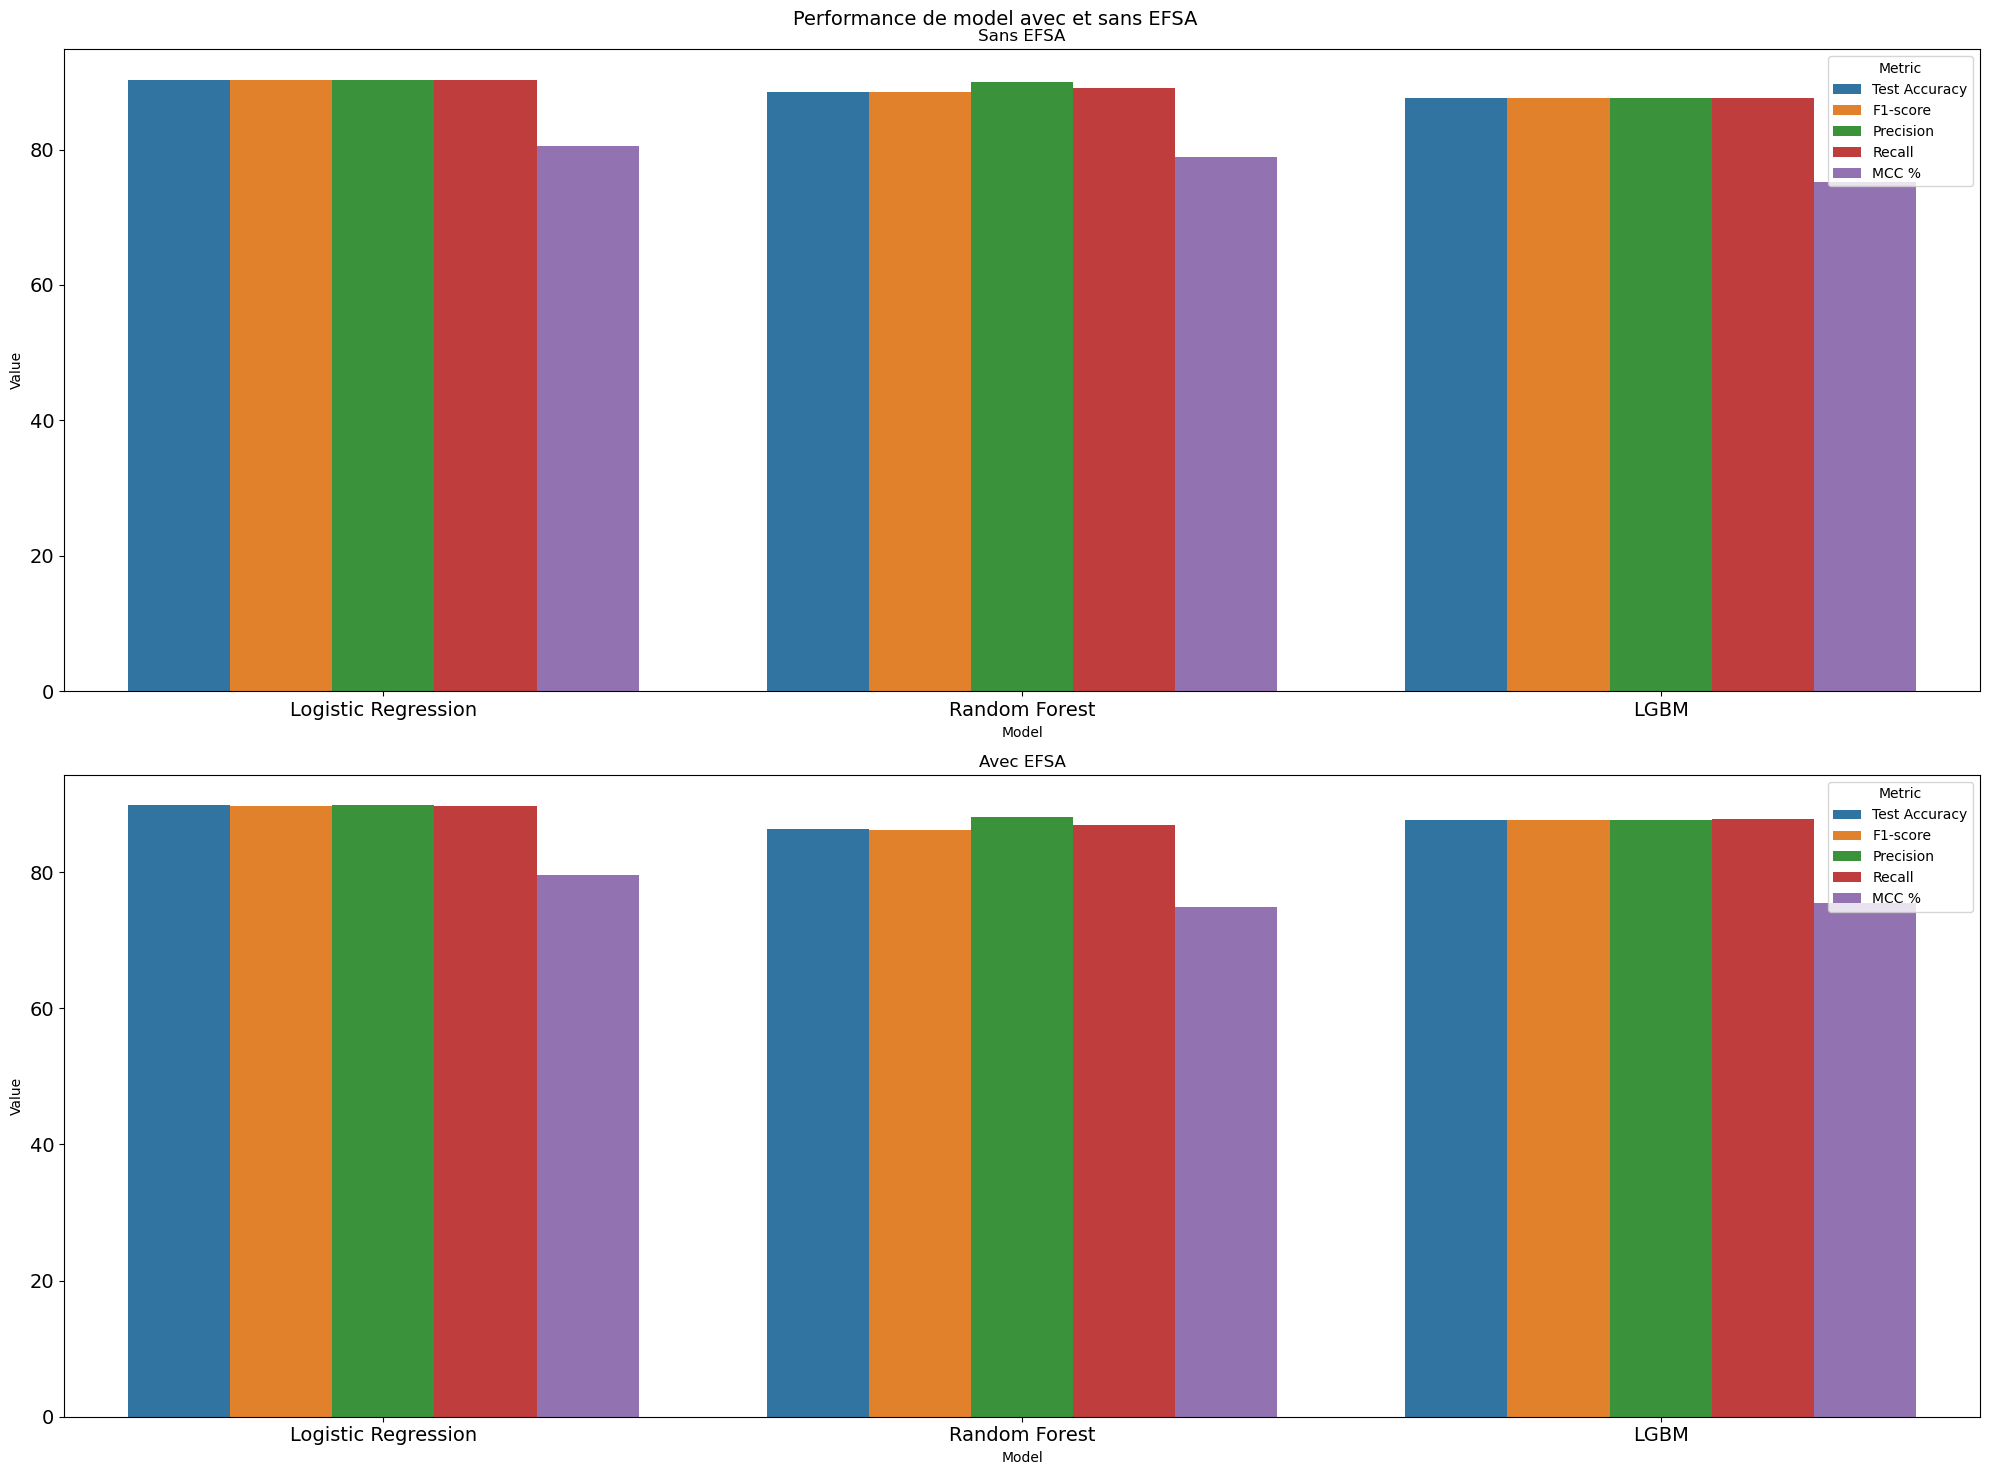

In [58]:
long_results = results_df.melt(id_vars=["Model", "EFSA"], value_vars=["Test Accuracy", "F1-score", "Precision", "Recall", "MCC %"],
                          var_name="Metric", value_name="Value")

fig, axes = plt.subplots(2,1,figsize=(20, 15))

sns.barplot(data=long_results[long_results['EFSA'] == False], x="Model", y="Value", hue="Metric",  ax=axes[0])
sns.barplot(data=long_results[long_results['EFSA'] == True], x="Model", y="Value", hue="Metric", ax=axes[1])

plt.suptitle("Performance de model avec et sans EFSA", fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_yscale('linear')

axes[0].set_title("Sans EFSA")
axes[1].set_title("Avec EFSA")
plt.tight_layout()
plt.show()

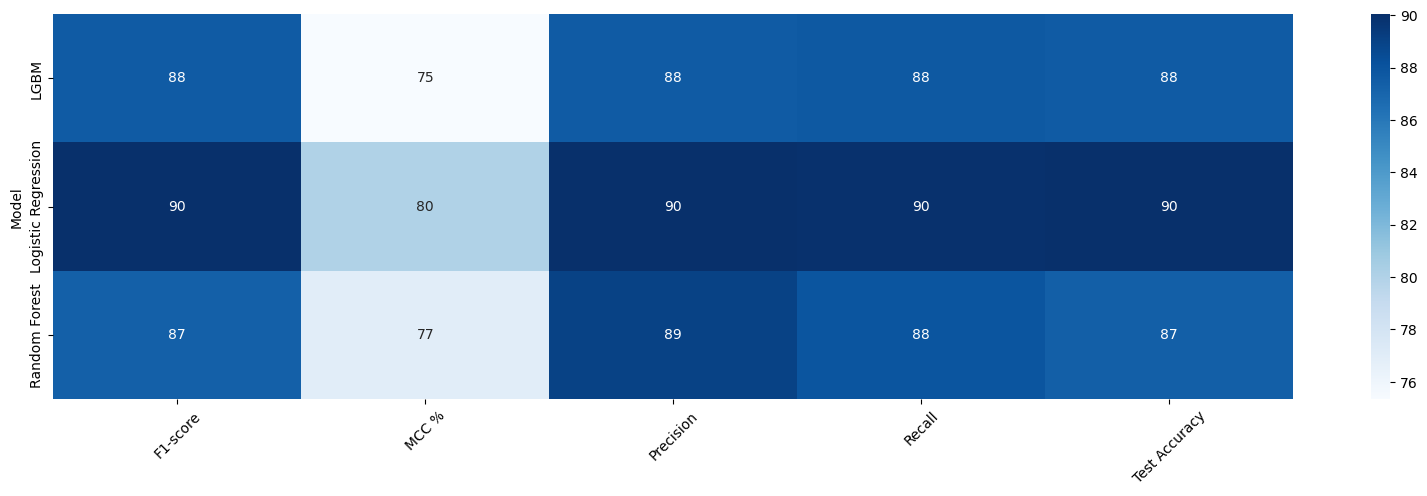

In [59]:
plt.figure(figsize=(20,5))
pivot_results = long_results.pivot_table(index='Model', columns='Metric', values='Value')
sns.heatmap(pivot_results, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()